In [2]:
import pandas as pd
from statsmodels.sandbox.stats.multicomp import multipletests
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as po
import plotly.io as pio
import numpy as np
import h5py

In [8]:
# Version 1
mult_reg_results_n_v_1, _, _,rsquared_n_v_1  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1/Naive/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_n_mf_1, _, _,rsquared_n_mf_1  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1/Naive/Still_MF/correlation_hamming_regression_results.pkl')
mult_reg_results_n_ff_1, _, _,rsquared_n_ff_1  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1/Naive/Still_FF/correlation_hamming_regression_results.pkl')

mult_reg_results_p_v_1, _, _,rsquared_p_s_1  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1/Prior/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_p_s_1, _, _,rsquared_p_v_1  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1/Prior/Still/correlation_hamming_regression_results.pkl')

v1_mult_reg_results = [mult_reg_results_n_v_1, mult_reg_results_n_mf_1, mult_reg_results_n_ff_1,mult_reg_results_p_v_1, mult_reg_results_p_s_1]
v1_mult_reg_results = pd.concat(v1_mult_reg_results)

In [9]:
# Version 2
mult_reg_results_n_v_2, _, _,rsquared_n_v_2  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_n_mf_2, _, _,rsquared_n_mf_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_MF/correlation_hamming_regression_results.pkl')
mult_reg_results_n_ff_2, _, _,rsquared_n_ff_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Naive/Still_FF/correlation_hamming_regression_results.pkl')

mult_reg_results_p_v_2, _, _,rsquared_p_s_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Video/correlation_hamming_regression_results.pkl')
mult_reg_results_p_s_2, _, _,rsquared_p_v_2   = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V2/Prior/Still/correlation_hamming_regression_results.pkl')

v2_mult_reg_results = [mult_reg_results_n_v_2, mult_reg_results_n_mf_2, mult_reg_results_n_ff_2,mult_reg_results_p_v_2, mult_reg_results_p_s_2]
v2_mult_reg_results = pd.concat(v2_mult_reg_results)

In [4]:
def visualize_significant_regressors(mult_reg_results, electrode_region, exp_type, stm_type, version):
    er_idx = mult_reg_results.electrode_region==electrode_region
    ex_idx = mult_reg_results.experiment_type==exp_type
    st_idx = mult_reg_results.stimuli_type==stm_type
    reg_df = mult_reg_results[ex_idx & st_idx & er_idx]
    if reg_df.empty:
        print("Empty df: " +exp_type+"_"+stm_type+"_"+electrode_region)
    else:
        sig_idx = multipletests(reg_df["p_value"], alpha=0.05, method='bonferroni')[0]
        reg_df.loc[:, 'significant'] = sig_idx.tolist()

        sig_reg_df = reg_df.loc[reg_df['significant']]
        
        if not sig_reg_df.empty:
            fig = px.line(sig_reg_df, 
                         x="time", y="beta_value",  color="model_name",
                        title=exp_type+" "+stm_type+" "+electrode_region+" timepoints where the regressors reached significance")

            fig.update_yaxes(title_text="Regressors")
            fig.update_xaxes(range=[-200, 600], title_text="Time ms (relative to stimulus onset)")
            
            # Change in server
            fig.write_image("/auto/data2/oelmas/outputs/multiple-regression/V"+str(version)+"/"+exp_type+"_"+stm_type+"_"+electrode_region+"_significant_beta_vals.png")
            #po.plot(fig, filename = "outputs/multiple-regression/V"+str(version)+"/"+exp_type+"_"+stm_type+"_"+electrode_region+"_significant_beta_vals.html", auto_open=False)

In [ ]:
v1_mult_reg_results = v1_mult_reg_results[v1_mult_reg_results.model_name != 'constant']
for electrode_region in v1_mult_reg_results.electrode_region.unique():
    for exp_type in v1_mult_reg_results.experiment_type.unique():
        for stm_type in v1_mult_reg_results.stimuli_type.unique():
            if exp_type == "prior" and stm_type == "still-mf":
                continue
            visualize_significant_regressors(v1_mult_reg_results, electrode_region, exp_type, stm_type, 1)

In [ ]:
v2_mult_reg_results = v2_mult_reg_results[v2_mult_reg_results.model_name != 'constant']
for electrode_region in v2_mult_reg_results.electrode_region.unique():
    for exp_type in v2_mult_reg_results.experiment_type.unique():
        for stm_type in v2_mult_reg_results.stimuli_type.unique():
            if exp_type == "prior" and stm_type == "still-mf":
                continue
            visualize_significant_regressors(v2_mult_reg_results, electrode_region, exp_type, stm_type, 2)

RSA RESULTS

pandas.core.frame.DataFrame

In [ ]:
# Plot on the correlational plot
avg_sbj_rsa_results, eeg_dist, model_dist  = pd.read_pickle('/auto/data2/oelmas/RSA_Results_V1//Naive/Video/correlation_hamming_avg_subjects_results.pkl')
rdm_df = avg_sbj_results

In [ ]:
def visualize_rsa_regression(rsa_df,mult_reg_results,model_name,electrode_region,exp_type,stm_type,version):
    
    # Get specified regression reesults
    er_idx = mult_reg_results.electrode_region==electrode_region
    ex_idx = mult_reg_results.experiment_type==exp_type
    st_idx = mult_reg_results.stimuli_type==stm_type
    md_idx = mult_reg_results.model_name==model_name
    reg_df = mult_reg_results[ex_idx & st_idx & er_idx & md_idx]
    
    df_to_plot = rdm_df[(rdm_df["model_name"] == model_name) 
                    & (rdm_df["electrode_region"] == electrode_region)
                    & (rdm_df["experiment_type"] == exp_type) 
                    & (rdm_df["stimulus_type"] == stm_type)]
    
    fig = go.Figure()

    # Plots the kendall tau curve
    fig.add_trace(go.Scatter(x=df_to_plot["time"],
                            y=df_to_plot["kendall_tau"],
                            mode='lines'))


    fig.add_shape(
            # Rectangle reference to the plot
                type="rect",
                xref="x",
                yref="paper",
                x0=min(reg_df.loc[reg_df['significant']].time),
                y0=0,
                x1=max(reg_df.loc[reg_df['significant']].time),
                y1=1,
                opacity=0.4,
                layer="below",
                line_width=0,
                fillcolor="LightSalmon",
                name='Model reached significance in the multiple regression analysis')

    fig.update_yaxes(title_text="Kendall-tau")
    fig.update_xaxes(range=[-200, 600], title_text="Time ms (relative to stimulus onset)")

    fig.update_layout(
        height=800,
        title_text='Correlation of the ' + model_name + ' model',
        showlegend=True
    )

    po.plot(fig, filename = "outputs/multiple-regression/TEST.html", auto_open=False)

In [7]:
windowed_eeg_rdm_dict_n_v

{(-10,
  -8): array([[7.44815691e-04, 9.78336160e-04, 1.35109287e+00, ...,
         1.21410875e-01, 1.78317206e+00, 1.39112578e+00],
        [4.09421091e-02, 2.80261875e-02, 5.73192654e-02, ...,
         1.19974379e+00, 1.89326571e+00, 1.26204595e+00],
        [1.52822868e+00, 1.49634275e+00, 6.86926347e-01, ...,
         9.35605211e-01, 1.83147344e+00, 1.60795398e+00],
        ...,
        [2.62245448e-03, 1.86519497e+00, 5.70378811e-01, ...,
         3.03613913e-02, 1.53980848e+00, 1.72927194e+00],
        [8.42440801e-01, 1.65532534e+00, 9.89482613e-01, ...,
         3.32279214e-01, 5.20222046e-01, 2.65028454e-02],
        [1.88275726e-01, 1.39190743e-01, 7.05221730e-01, ...,
         1.50867371e-01, 1.68980663e-03, 1.21609784e-01]]),
 (-100,
  -98): array([[1.91270415, 0.5076823 , 0.16443248, ..., 1.50371346, 0.4975831 ,
         1.99999887],
        [0.00471005, 1.68257725, 1.95687277, ..., 0.78448084, 1.38386033,
         1.98442037],
        [0.05834267, 1.29600217, 0.13131263, 

In [6]:
#############################################################
#############################################################
# variance inflation factor
VIF =  pd.read_csv('/auto/data2/oelmas/RSA_Results_V1//Naive/Video/VIF_Results.csv', index_col=[0])
print(VIF)

   VIF Factor                       model_name
0    1.062147          action_category_hamming
1    2.062476                    agent_hamming
2    2.548493  flowModel_10_frames_correlation
3    3.587962  video_gabor__frames_correlation


In [61]:
electrode_region = "parietal"
rsquared_dict = {'V1':[rsquared_n_v_1[electrode_region]],
                 'V2':[rsquared_n_v_2[electrode_region]]}
model_name = "agent_hamming"
rsquared_list = rsquared_dict
df=mult_reg_results_n_ff_2

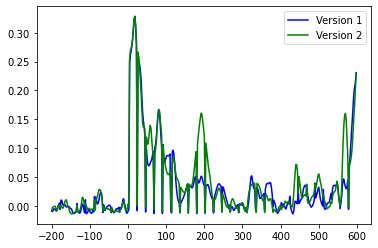

In [62]:
import matplotlib.pyplot as plt
for version,item in rsquared_dict.items():
    for rsquared_list in item:
        if(version == "V1"):
            c = "b"
            l="Version 1"
        else:
            c = "g"
            l="Version 2"
        plt.plot(df[(df["electrode_region"]==electrode_region)
                    &(df["model_name"]==model_name)].time,rsquared_list,c,label=l)
plt.legend()

In [60]:
len(rsquared_dict["V1"][0])

400

In [ ]:
# Plots the kendall tau curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(list(range(0,400))),
                            y=rsquared_list,
                            mode='lines'))
